In [1]:
library(rethinking)

Loading required package: parallel

rethinking (Version 2.13.2)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent




In [11]:
library(dagitty)

# Spurious associations example

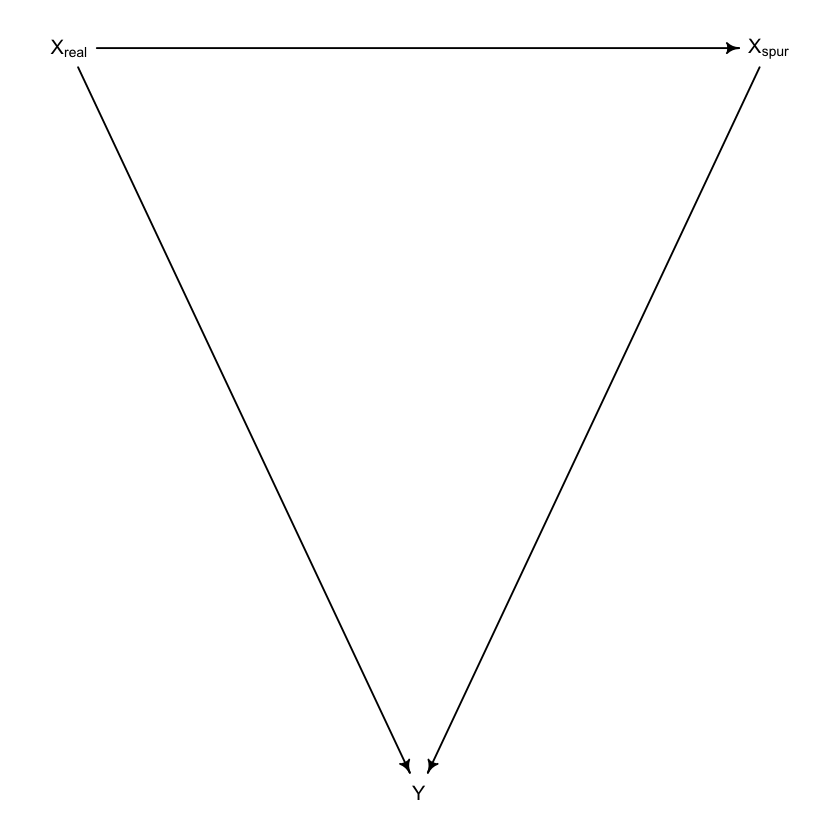

In [13]:
library(dagitty)
dag <- dagitty( "dag {
X_real -> Y 
X_real -> X_spur 
X_spur -> Y
}")
coordinates(dag) <- list( x=c(X_real=0,Y=1,X_spur=2) , y=c(X_real=0,Y=1,X_spur=0) ) 
drawdag( dag )

In [2]:
N <- 100
x_real <- rnorm( N )
x_spur <- rnorm( N , x_real )
y <- rnorm( N , x_real )
d <- data.frame(y,x_real,x_spur)

## Using only real variable as predictor

In [4]:
m_real <- quap( alist(
    y ~ dnorm( mu , sigma ) , 
    mu <- a + b_real * x_real ,
    a ~ dnorm( 0 , 0.2 ),
    b_real ~ dnorm( 0 , 0.5 ) , 
    sigma ~ dexp( 1 )
) , data = d )

In [19]:
x_seq <- seq( from=-3 , to=3 , length.out=50 )
mu <- link(m_real, data = list(x_real=x_seq))

In [20]:
head(mu)

-2.675916,-2.567661,-2.459406,-2.351151,-2.242896,-2.134641,-2.026386,-1.918131,-1.809876,-1.701620,⋯,1.654288,1.762543,1.870798,1.979053,2.087308,2.195563,2.303818,2.412073,2.520328,2.628584
-2.696262,-2.584105,-2.471947,-2.359790,-2.247632,-2.135474,-2.023317,-1.911159,-1.799002,-1.686844,⋯,1.790041,1.902199,2.014357,2.126514,2.238672,2.350829,2.462987,2.575145,2.687302,2.799460
-2.605518,-2.499359,-2.393199,-2.287039,-2.180879,-2.074719,-1.968559,-1.862400,-1.756240,-1.650080,⋯,1.640874,1.747034,1.853194,1.959354,2.065514,2.171673,2.277833,2.383993,2.490153,2.596313
-2.929732,-2.818346,-2.706959,-2.595573,-2.484186,-2.372800,-2.261413,-2.150027,-2.038640,-1.927254,⋯,1.525726,1.637113,1.748499,1.859886,1.971272,2.082659,2.194045,2.305432,2.416818,2.528205
-3.121734,-2.994159,-2.866583,-2.739008,-2.611433,-2.483857,-2.356282,-2.228707,-2.101132,-1.973556,⋯,1.981278,2.108853,2.236428,2.364004,2.491579,2.619154,2.746730,2.874305,3.001880,3.129455
-2.726817,-2.612627,-2.498436,-2.384245,-2.270055,-2.155864,-2.041673,-1.927483,-1.813292,-1.699102,⋯,1.840808,1.954998,2.069189,2.183379,2.297570,2.411761,2.525951,2.640142,2.754333,2.868523


In [21]:
mu_mean <- apply( mu , 2 , mean )
mu_PI <- apply( mu , 2 , PI )

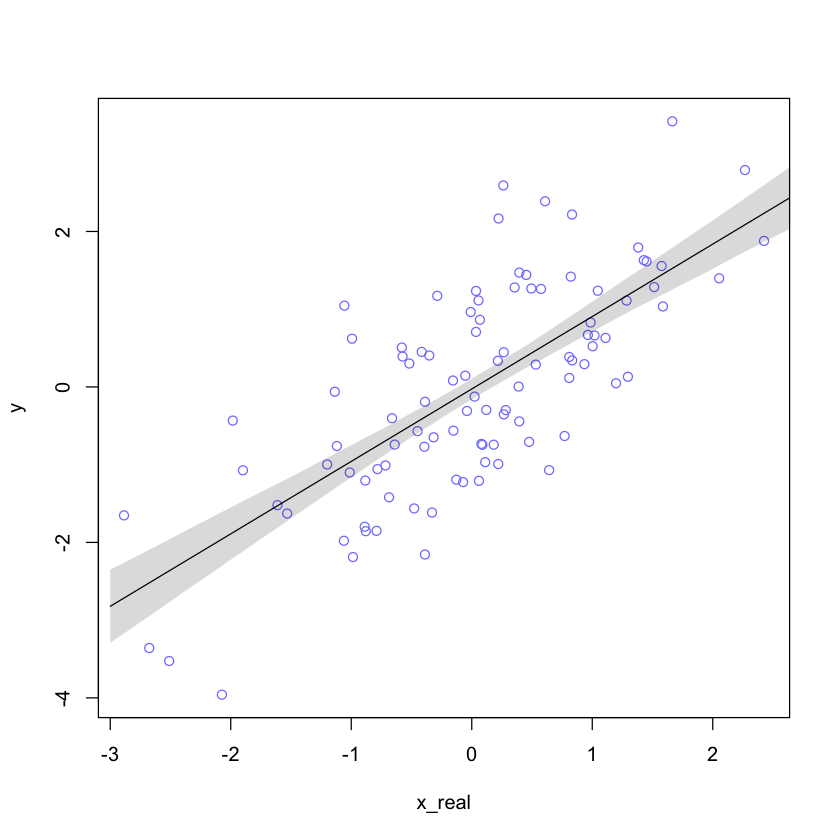

In [24]:
plot(y~x_real, data=d, col=rangi2)
lines(x_seq, mu_mean)
shade( mu_PI , x_seq )

Strong relationship between predictor and output

In [25]:
precis(m_real)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,-0.03132825,0.08404773,-0.1656528,0.1029962
b_real,0.93113769,0.08859659,0.7895432,1.0727321
sigma,0.92596706,0.06509861,0.8219269,1.0300072


## Using only spurious variable as predictor

In [26]:
m_spur <- quap( alist(
    y ~ dnorm( mu , sigma ) , 
    mu <- a + b_spur * x_spur ,
    a ~ dnorm( 0 , 0.2 ),
    b_spur ~ dnorm( 0 , 0.5 ) , 
    sigma ~ dexp( 1 )
) , data = d )

In [32]:
x_seq <- seq( from=-4 , to=4 , length.out=50 )
mu <- link(m_spur, data = list(x_spur=x_seq))

In [33]:
head(mu)

-1.306024,-1.252275,-1.198526,-1.144777,-1.091028,-1.037279,-0.9835297,-0.9297806,-0.8760316,-0.8222825,⋯,0.8439377,0.8976868,0.9514358,1.0051849,1.058934,1.112683,1.166432,1.220181,1.273930,1.327679
-1.903627,-1.832017,-1.760408,-1.688798,-1.617189,-1.545579,-1.4739696,-1.4023600,-1.3307505,-1.2591409,⋯,0.9607559,1.0323654,1.1039750,1.1755846,1.247194,1.318804,1.390413,1.462023,1.533632,1.605242
-2.187003,-2.099114,-2.011224,-1.923334,-1.835444,-1.747554,-1.6596640,-1.5717740,-1.4838841,-1.3959942,⋯,1.3285933,1.4164833,1.5043732,1.5922631,1.680153,1.768043,1.855933,1.943823,2.031713,2.119603
-1.493302,-1.436287,-1.379272,-1.322257,-1.265241,-1.208226,-1.1512110,-1.0941957,-1.0371805,-0.9801653,⋯,0.7873067,0.8443219,0.9013372,0.9583524,1.015368,1.072383,1.129398,1.186413,1.243429,1.300444
-1.793614,-1.720279,-1.646945,-1.573610,-1.500276,-1.426941,-1.3536068,-1.2802724,-1.2069379,-1.1336034,⋯,1.1397647,1.2130991,1.2864336,1.3597680,1.433103,1.506437,1.579771,1.653106,1.726440,1.799775
-1.941077,-1.857950,-1.774824,-1.691697,-1.608570,-1.525443,-1.4423162,-1.3591894,-1.2760625,-1.1929357,⋯,1.3839966,1.4671234,1.5502503,1.6333771,1.716504,1.799631,1.882758,1.965885,2.049011,2.132138


In [34]:
mu_mean <- apply( mu , 2 , mean )
mu_PI <- apply( mu , 2 , PI )

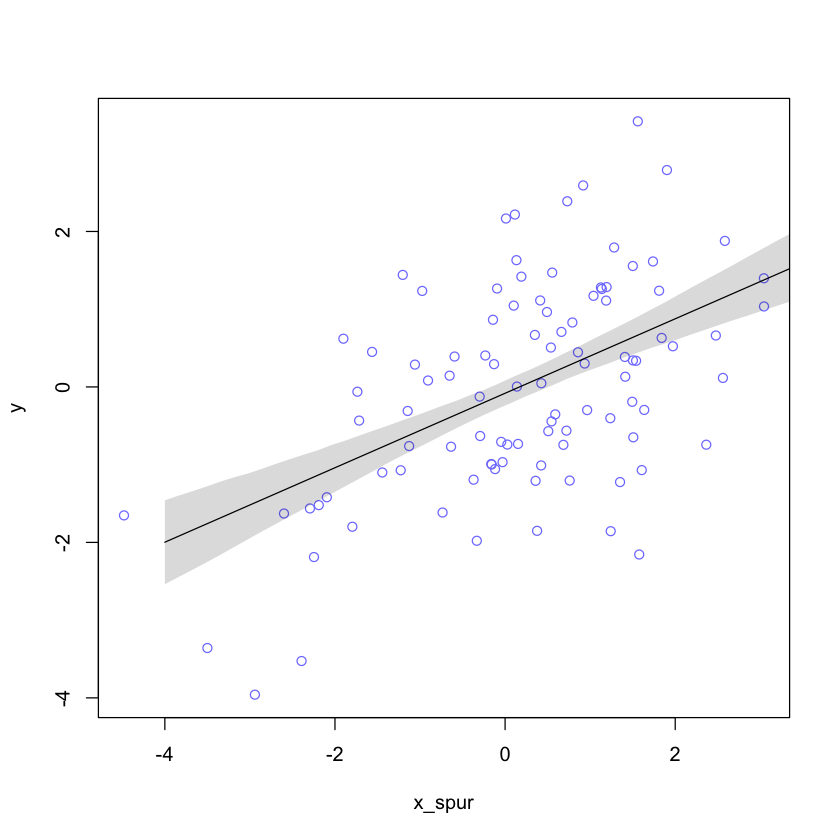

In [35]:
plot(y~x_spur, data=d, col=rangi2)
lines(x_seq, mu_mean)
shade( mu_PI , x_seq )

Weaker relationship (but still present).

In [36]:
precis(m_spur)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,-0.0838560,0.10069551,-0.2447869,0.07707487
b_spur,0.4772699,0.07928020,0.3505649,0.60397502
sigma,1.1539901,0.08096158,1.0245979,1.28338237


## Using both predictors

In [37]:
m_all <- quap( alist(
    y ~ dnorm( mu , sigma ) , 
    mu <- a + b_real * x_real + b_spur * x_spur ,
    a ~ dnorm( 0 , 0.2 ),
    b_real ~ dnorm( 0 , 0.5 ) ,
    b_spur ~ dnorm( 0 , 0.5 ) ,
    sigma ~ dexp( 1 )
) , data = d )

In [38]:
x_seq <- seq( from=-4 , to=4 , length.out=50 )
mu <- link(m_all, data = list(x_real=x_seq, x_spur=x_seq))

In [39]:
head(mu)

-4.070400,-3.909513,-3.748625,-3.587738,-3.426850,-3.265963,-3.105075,-2.944188,-2.783301,-2.622413,⋯,2.365099,2.525986,2.686874,2.847761,3.008649,3.169536,3.330423,3.491311,3.652198,3.813086
-3.641338,-3.490126,-3.338914,-3.187702,-3.036490,-2.885279,-2.734067,-2.582855,-2.431643,-2.280431,⋯,2.407134,2.558346,2.709557,2.860769,3.011981,3.163193,3.314405,3.465616,3.616828,3.768040
-4.084425,-3.912982,-3.741539,-3.570096,-3.398652,-3.227209,-3.055766,-2.884323,-2.712880,-2.541437,⋯,2.773299,2.944742,3.116185,3.287628,3.459072,3.630515,3.801958,3.973401,4.144844,4.316287
-3.266998,-3.133137,-2.999276,-2.865416,-2.731555,-2.597694,-2.463833,-2.329972,-2.196111,-2.062250,⋯,2.087437,2.221297,2.355158,2.489019,2.622880,2.756741,2.890602,3.024463,3.158323,3.292184
-3.080721,-2.960121,-2.839521,-2.718921,-2.598322,-2.477722,-2.357122,-2.236522,-2.115922,-1.995323,⋯,1.743270,1.863870,1.984470,2.105069,2.225669,2.346269,2.466869,2.587469,2.708068,2.828668
-4.504930,-4.322802,-4.140674,-3.958546,-3.776418,-3.594290,-3.412162,-3.230035,-3.047907,-2.865779,⋯,2.780186,2.962314,3.144442,3.326570,3.508698,3.690826,3.872954,4.055082,4.237210,4.419338


In [40]:
mu_mean <- apply( mu , 2 , mean )
mu_PI <- apply( mu , 2 , PI )

Not any advantage in knowing the variable $x_{spur}$ when you know the variable $x_{real}$.

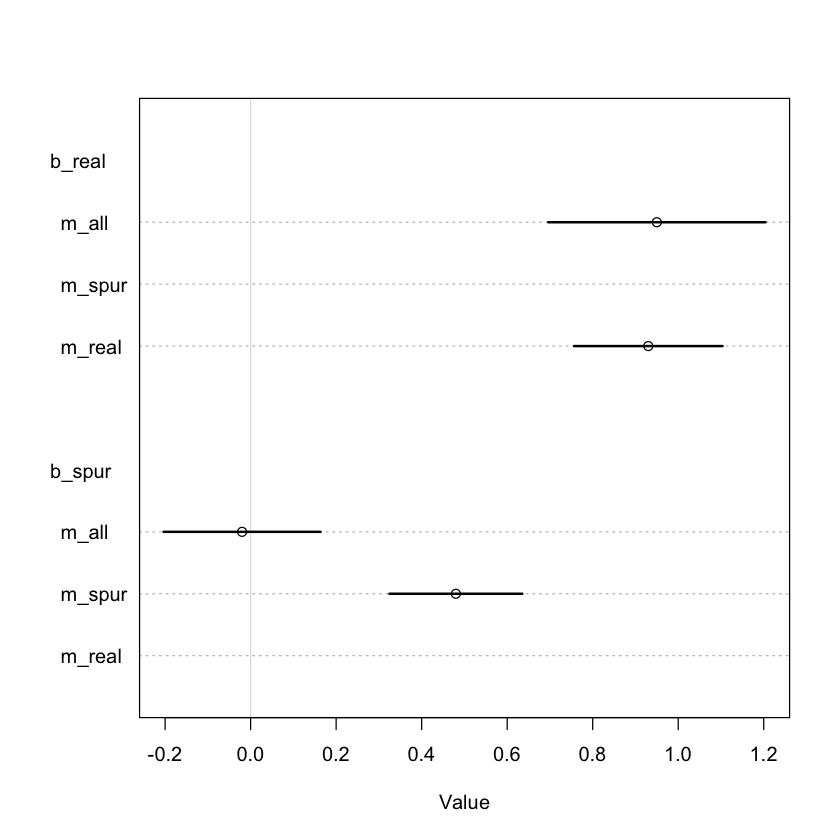

In [42]:
plot( coeftab(m_real,m_spur,m_all), par=c("b_real","b_spur") )

In [43]:
precis(m_all)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,-0.02867030,0.08506076,-0.1646138,0.1072732
b_real,0.94985021,0.12968776,0.7425841,1.1571163
b_spur,-0.01846566,0.09356937,-0.1680076,0.1310763
sigma,0.92515159,0.06512476,0.8210697,1.0292335


## residuals of posterior

Predicting spurious variable with real variable

In [72]:
m_sp_res <- quap( alist(
    x_spur ~ dnorm( mu , sigma ) , 
    mu <- a + b_real * x_real,
    a ~ dnorm( 0 , 0.2 ),
    b_real ~ dnorm( 0 , 0.5 ) ,
    sigma ~ dexp( 1 )
) , data = d )

In [73]:
x_seq = seq(-6,6,length.out = 50)
mu <- link(m_sp_res, data = list(x_real=x_seq))
mu_mean <- apply( mu , 2 , mean )
mu_PI <- apply( mu , 2 , PI )
mu_resid <- d$x_spur - mu_mean

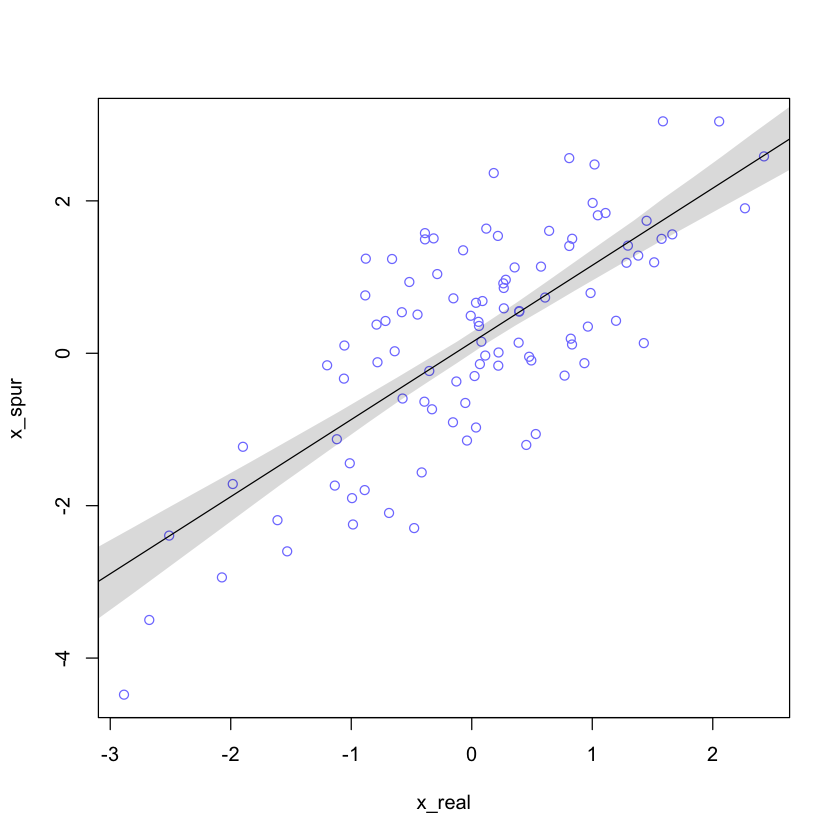

In [74]:
#plot(x_spur~x_real, data=d, col=rangi2)
plot(x_spur~x_real, data=d, col=rangi2)
lines(x_seq, mu_mean)
shade( mu_PI , x_seq )

predicting $y$ with residuals

In [76]:
d$x_spur_res = mu_resid

In [77]:
m_sp_res <- quap( alist(
    y ~ dnorm( mu , sigma ) , 
    mu <- a + b_spur_res * x_spur_res,
    a ~ dnorm( 0 , 0.2 ),
    b_spur_res ~ dnorm( 0 , 0.5 ) ,
    sigma ~ dexp( 1 )
) , data = d )

In [78]:
x_seq = seq(-6,6,length.out = 50)
mu <- link(m_sp_res, data = list(x_spur_res=x_seq))
mu_mean <- apply( mu , 2 , mean )
mu_PI <- apply( mu , 2 , PI )

residuals <0 and >0 have little difference in what is the outcome of $y$ on average. This means that once we remove the effect of $x_real$ on the spurious variable, what is left is of little information for our prediction

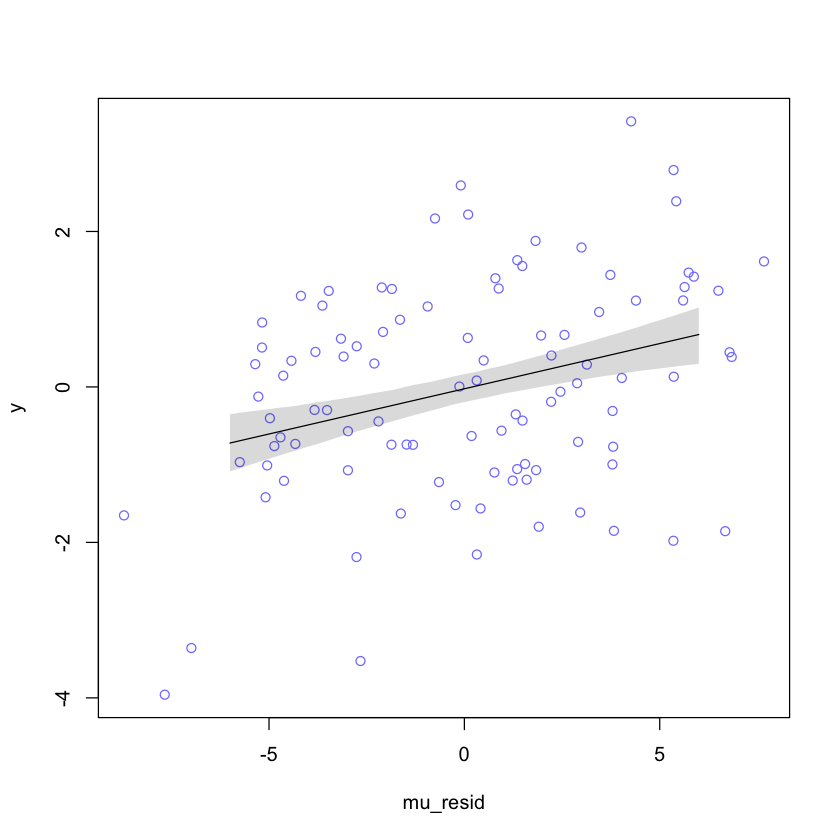

In [79]:
plot(y~mu_resid, data=d, col=rangi2)
lines(x_seq, mu_mean)
shade( mu_PI , x_seq )

Conversely, predicting the real predictor with the spurious variable will have little effect on the residuals

In [80]:
m_re_res <- quap( alist(
    x_real ~ dnorm( mu , sigma ) , 
    mu <- a + b_spur * x_spur,
    a ~ dnorm( 0 , 0.2 ),
    b_spur ~ dnorm( 0 , 0.5 ) ,
    sigma ~ dexp( 1 )
) , data = d )

In [81]:
x_seq = seq(-6,6,length.out = 50)
mu <- link(m_re_res, data = list(x_spur=x_seq))
mu_mean <- apply( mu , 2 , mean )
mu_PI <- apply( mu , 2 , PI )
mu_resid <- d$x_real - mu_mean

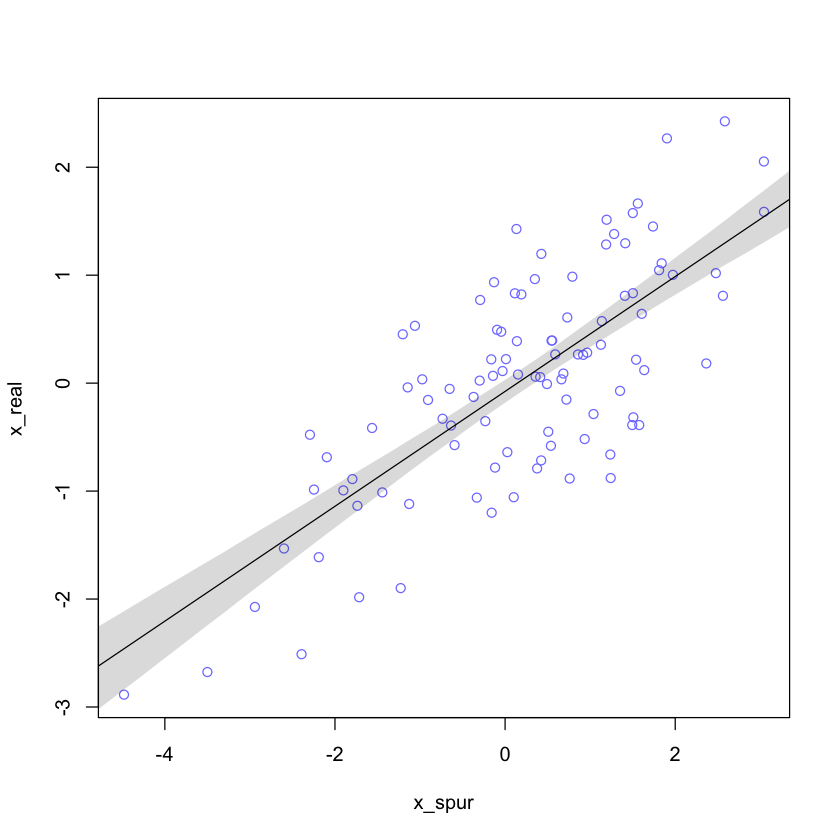

In [82]:
#plot(x_spur~x_real, data=d, col=rangi2)
plot(x_real~x_spur, data=d, col=rangi2)
lines(x_seq, mu_mean)
shade( mu_PI , x_seq )

In [83]:
d$x_real_res = mu_resid

In [90]:
m_re_res <- quap( alist(
    y ~ dnorm( mu , sigma ) , 
    mu <- a + b_real_res * x_real_res,
    a ~ dnorm( 0 , 0.2 ),
    b_real_res ~ dnorm( 0 , 0.5 ) ,
    sigma ~ dexp( 1 )
) , data = d )

In [91]:
x_seq = seq(-6,6,length.out = 50)
mu <- link(m_re_res, data = list(x_real_res=x_seq))
mu_mean <- apply( mu , 2 , mean )
mu_PI <- apply( mu , 2 , PI )

residuals <0 and >0 have little difference in what is the outcome of $y$ on average. This means that once we remove the effect of $x_real$ on the spurious variable, what is left is of little information for our prediction

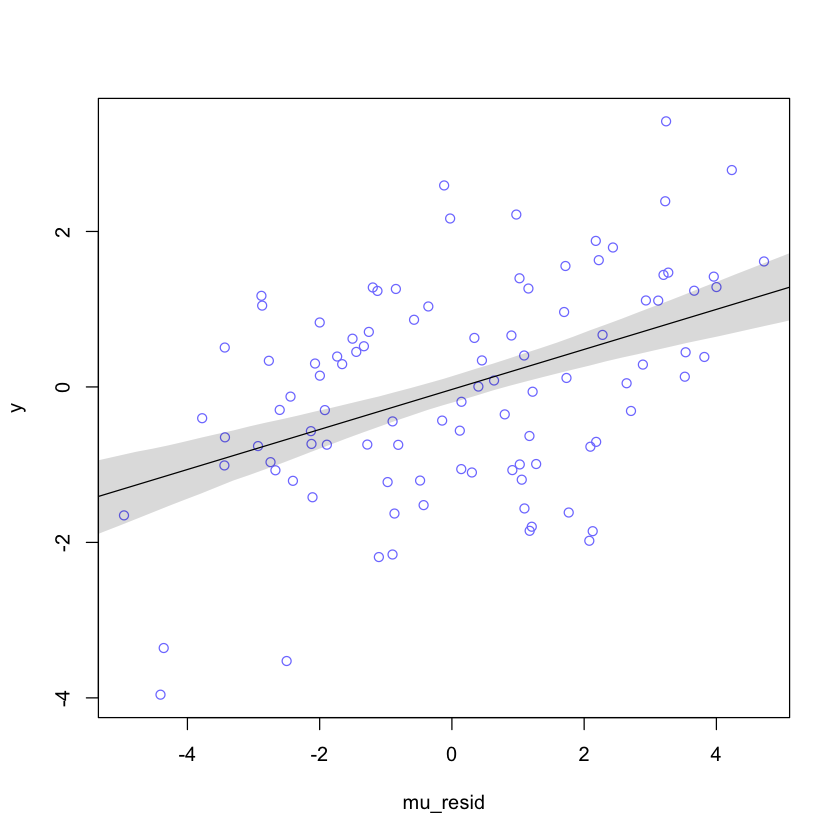

In [92]:
plot(y~mu_resid, data=d, col=rangi2)
lines(x_seq, mu_mean)
shade( mu_PI , x_seq )

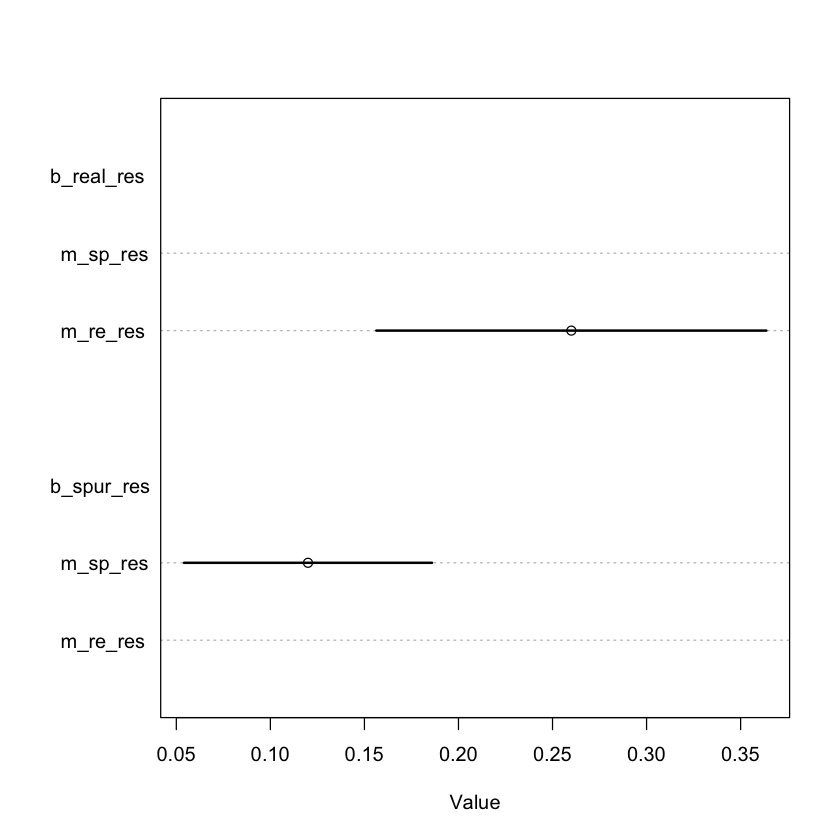

In [93]:
plot( coeftab(m_re_res,m_sp_res), par=c("b_real_res","b_spur_res") )